## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [4]:
# Your code here - remember to use markdown cells for comments as well!

## Business Problem:

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Files to use:

imdb.title.basics

imdb.title.ratings

bom.movie_gross

In [5]:
import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

folder = "/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/zippedData"
os.listdir(folder)

['bom.movie_gross.csv.gz',
 'cleaned_movie_data.csv',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'movie_data_cleaned.csv',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [6]:
imdb_title_basics = pd.read_csv('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz')
imdb_title_ratings = pd.read_csv('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz')
bom_movie_gross = pd.read_csv('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz')


In [7]:
display(imdb_title_basics.info())
imdb_title_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
display(imdb_title_ratings.info())
imdb_title_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
display(bom_movie_gross.info())
bom_movie_gross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
imdb_data = pd.merge(imdb_title_basics, 
                     imdb_title_ratings, 
                     on='tconst', 
                     how='inner')
imdb_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [11]:
imdb_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
imdb_data.rename(columns = {'primary_title': 'title', 'averagerating': 'average_rating'}, inplace = True)
imdb_data.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,average_rating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
movie_data = pd.merge(imdb_data, 
                      bom_movie_gross,
                      on= 'title',
                      how= 'inner')
display(movie_data.info())
movie_data.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   average_rating   3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


None

,tconst,title,original_title,start_year,runtime_minutes,genres,average_rating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015
7,tt0372538,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Fox,110800000.0,124800000,2015
8,tt3079380,Spy,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Fox,110800000.0,124800000,2015
9,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,10800000,2011


In [14]:
movie_data.sort_values('title', inplace = True)
movie_data.head(10)

,tconst,title,original_title,start_year,runtime_minutes,genres,average_rating,numvotes,studio,domestic_gross,foreign_gross,year
2022,tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000,2015
1848,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,NaN,2014
280,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000,2016
1142,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,NaN,2012
2288,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,NaN,2015
2940,tt6580564,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000,2018
1127,tt1712159,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",4.0,11712,Rocket,32800.0,5700000,2011
577,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,WB,45800000.0,21600000,2018
1549,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301,FoxS,56700000.0,131100000,2013
777,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949,FoxS,18300000.0,42400000,2010


In [15]:
movie_data.drop_duplicates(inplace=True)
display(movie_data.info())
movie_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   average_rating   3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


None

,tconst,title,original_title,start_year,runtime_minutes,genres,average_rating,numvotes,studio,domestic_gross,foreign_gross,year
2022,tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000,2015
1848,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,NaN,2014
280,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000,2016
1142,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,NaN,2012
2288,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,NaN,2015
2940,tt6580564,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000,2018
1127,tt1712159,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",4.0,11712,Rocket,32800.0,5700000,2011
577,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,WB,45800000.0,21600000,2018
1549,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301,FoxS,56700000.0,131100000,2013
777,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949,FoxS,18300000.0,42400000,2010


In [16]:
movie_data.drop(['tconst', 'studio', 'original_title', 'numvotes', 'year'], axis=1, inplace=True)

In [17]:
movie_data['start_year'].describe()

count    3027.000000
mean     2013.783284
std         2.466955
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: start_year, dtype: float64

In [18]:
movie_data.head(10)

,title,start_year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,NaN
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,NaN
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,NaN
2940,102 Not Out,2018,102.0,"Comedy,Drama",7.5,1300000.0,10900000
1127,11-11-11,2011,90.0,"Horror,Mystery,Thriller",4.0,32800.0,5700000
577,12 Strong,2018,130.0,"Action,Drama,History",6.6,45800000.0,21600000
1549,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,56700000.0,131100000
777,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,18300000.0,42400000


In [19]:
movie_data[movie_data.isna().any(axis=1)]

,title,start_year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,NaN
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,NaN
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,NaN
1569,13 Sins,2014,93.0,"Horror,Thriller",6.3,13800.0,NaN
642,14 Blades,2010,114.0,"Action,History,Thriller",6.4,NaN,3800000
...,...,...,...,...,...,...,...
1990,Youth,2013,107.0,Drama,6.1,2700000.0,NaN
881,Z for Zachariah,2015,98.0,"Drama,Sci-Fi,Thriller",6.0,121000.0,NaN
2366,Zero Motivation,2014,97.0,"Comedy,Drama",7.3,116000.0,NaN
805,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",8.1,3100000.0,NaN


In [20]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   start_year       3027 non-null   int64  
 2   runtime_minutes  2980 non-null   float64
 3   genres           3020 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 189.2+ KB


In [21]:
movie_data.rename(columns = {'start_year': 'year'}, inplace = True)

In [22]:
movie_data.head()

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,NaN
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,NaN
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,NaN


In [23]:
movie_data['runtime_minutes'].describe()

count    2980.000000
mean      107.217114
std        20.073886
min         3.000000
25%        94.000000
50%       105.000000
75%       118.000000
max       272.000000
Name: runtime_minutes, dtype: float64

In [24]:
movie_data['genres'] = movie_data['genres'].fillna('Unknown')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   year             3027 non-null   int64  
 2   runtime_minutes  2980 non-null   float64
 3   genres           3027 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 189.2+ KB


In [25]:
movie_data['runtime_minutes'].fillna(movie_data['runtime_minutes'].median(), inplace=True)
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   year             3027 non-null   int64  
 2   runtime_minutes  3027 non-null   float64
 3   genres           3027 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 189.2+ KB


In [26]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   year             3027 non-null   int64  
 2   runtime_minutes  3027 non-null   float64
 3   genres           3027 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 189.2+ KB


In [27]:
movie_data['foreign_gross'] = movie_data['foreign_gross'].str.replace(',','')

In [28]:
movie_data['foreign_gross'] = movie_data['foreign_gross'].astype('float64')

In [29]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   year             3027 non-null   int64  
 2   runtime_minutes  3027 non-null   float64
 3   genres           3027 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 189.2+ KB


In [30]:
movie_data['domestic_gross'].describe()

count    3.005000e+03
mean     3.064033e+07
std      6.671629e+07
min      1.000000e+02
25%      1.390000e+05
50%      2.000000e+06
75%      3.250000e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64

In [31]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   year             3027 non-null   int64  
 2   runtime_minutes  3027 non-null   float64
 3   genres           3027 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3005 non-null   float64
 6   foreign_gross    1832 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 189.2+ KB


In [32]:
movie_data['domestic_gross'].fillna(0, inplace=True)

In [33]:
movie_data['foreign_gross'].fillna(0, inplace=True)

In [34]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 2022 to 2165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   year             3027 non-null   int64  
 2   runtime_minutes  3027 non-null   float64
 3   genres           3027 non-null   object 
 4   average_rating   3027 non-null   float64
 5   domestic_gross   3027 non-null   float64
 6   foreign_gross    3027 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 189.2+ KB


In [35]:
movie_data.head()

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000.0
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,0.0
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000.0
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,0.0
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,0.0


## Feature Engineering

In [36]:
movie_data['total_gross'] = (movie_data['domestic_gross'] + movie_data['foreign_gross'])
movie_data.head()

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross,total_gross
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000.0,1655000.0
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,0.0,53900.0
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000.0,110200000.0
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,0.0,203000.0
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,0.0,11000.0


In [37]:
split_genres = movie_data['genres'].str.split(',', n=-1, expand=True)
split_genres

,0,1,2
2022,Action,Drama,Thriller
1848,Drama,War,None
280,Drama,Horror,Mystery
1142,Comedy,Drama,Romance
2288,Drama,None,None
...,...,...,...
805,Comedy,Drama,None
2091,Action,Adventure,Comedy
333,Comedy,Family,Romance
916,Comedy,None,None


In [38]:
movie_data[['genre_1', 'genre_2', 'genre_3']] = movie_data['genres'].str.split(',', n=-1, expand=True)
movie_data.head()

,title,year,runtime_minutes,genres,average_rating,domestic_gross,foreign_gross,total_gross,genre_1,genre_2,genre_3
2022,'71,2014,99.0,"Action,Drama,Thriller",7.2,1300000.0,355000.0,1655000.0,Action,Drama,Thriller
1848,"1,000 Times Good Night",2013,117.0,"Drama,War",7.1,53900.0,0.0,53900.0,Drama,War,None
280,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,72100000.0,38100000.0,110200000.0,Drama,Horror,Mystery
1142,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,203000.0,0.0,203000.0,Comedy,Drama,Romance
2288,1001 Grams,2014,93.0,Drama,6.3,11000.0,0.0,11000.0,Drama,None,None


In [39]:
movie_data.to_csv('/Users/norrp/Documents/Flatiron/Phase_1/Project/dsc-phase-1-project/zippedData/movie_data_cleaned.csv')

In [40]:
movie_data['total_gross'].describe()

count    3.027000e+03
mean     7.778194e+07
std      1.728738e+08
min      1.000000e+02
25%      3.051000e+05
50%      6.800000e+06
75%      7.037850e+07
max      1.405400e+09
Name: total_gross, dtype: float64

In [41]:
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
movie_data['total_gross'].describe()

count           3,027.00
mean       77,781,942.82
std       172,873,755.51
min               100.00
25%           305,100.00
50%         6,800,000.00
75%        70,378,500.00
max     1,405,400,000.00
Name: total_gross, dtype: float64

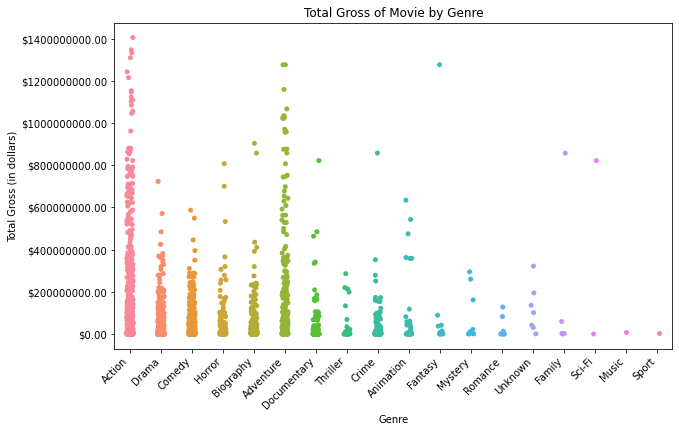

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
sns.stripplot(ax=ax, x='genre_1', y='total_gross', data=movie_data)
ax.set_xlabel('Genre')
ax.set_ylabel('Total Gross (in dollars)')
ax.set_title('Total Gross of Movie by Genre')
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.xticks(rotation=45, ha="right")
plt.show()

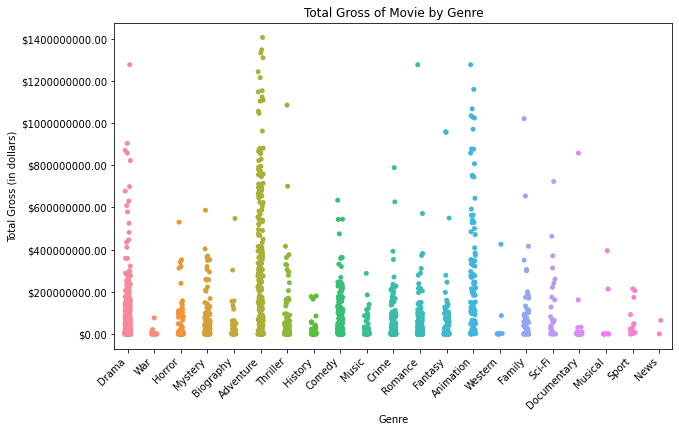

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
sns.stripplot(ax=ax, x='genre_2', y='total_gross', data=movie_data)
ax.set_xlabel('Genre')
ax.set_ylabel('Total Gross (in dollars)')
ax.set_title('Total Gross of Movie by Genre')
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.xticks(rotation=45, ha="right")
plt.show()

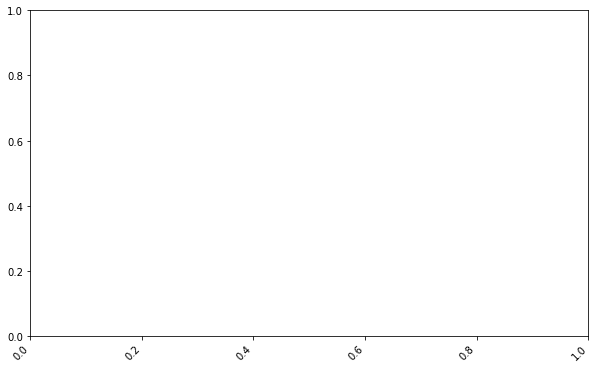

In [45]:
fig, axs = plt.subplots(figsize=(10,6))
sns.stripplot(ax=ax, x='genre_3', y='total_gross', data=movie_data)
ax.set_xlabel('Genre')
ax.set_ylabel('Total Gross (in dollars)')
ax.set_title('Total Gross of Movie by Genre')
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-57-26632475ed85>:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  genre_axes[1].set_yticks([], [])
<ipython-input-57-26632475ed85>:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  genre_axes[2].set_yticks([], [])


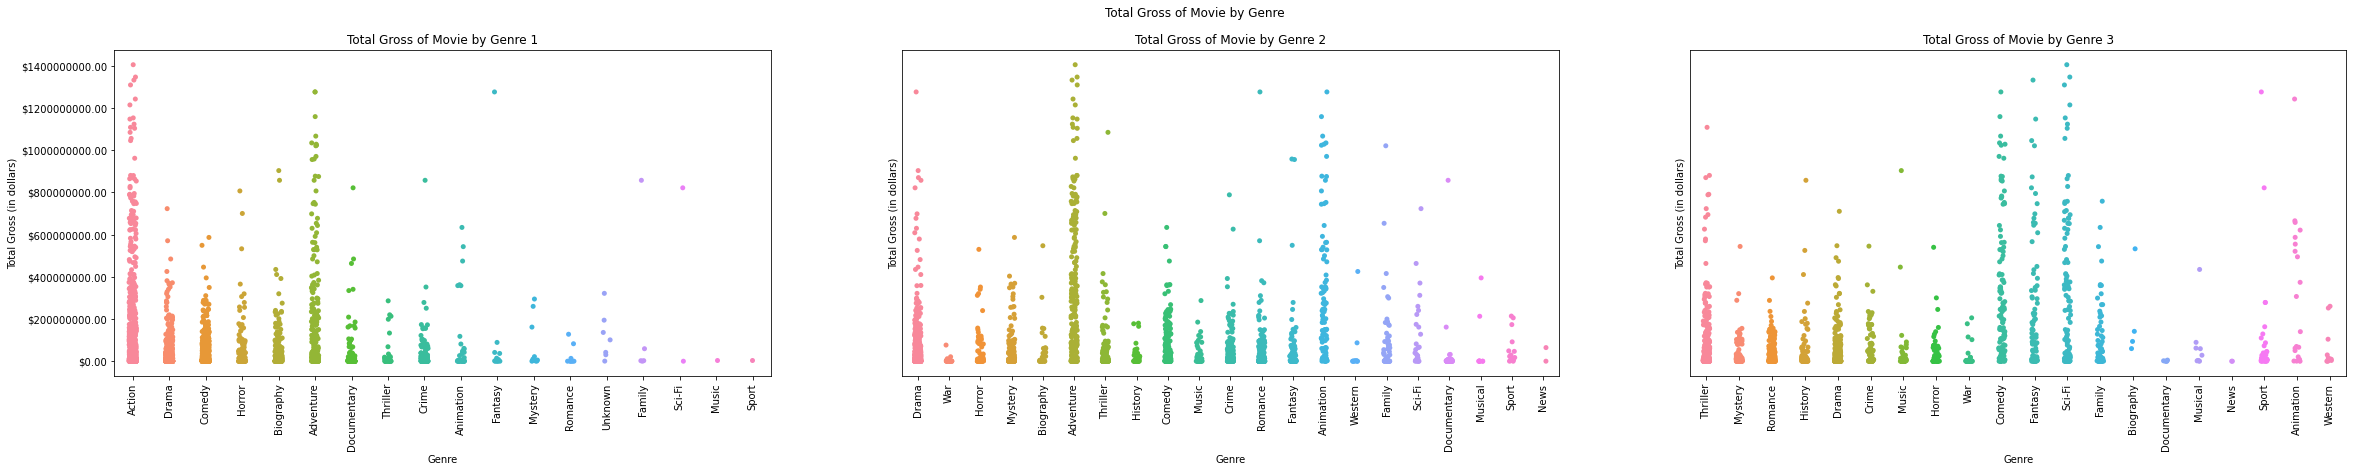

In [57]:
genre_fig, genre_axes = plt.subplots(nrows=1, ncols=3, figsize=(40,6), )

sns.stripplot(ax=genre_axes[0], x='genre_1', y='total_gross', data=movie_data)
genre_axes[0].set_xlabel('Genre')
genre_axes[0].set_ylabel('Total Gross (in dollars)')
genre_axes[0].set_title('Total Gross of Movie by Genre 1')
genre_axes[0].yaxis.set_major_formatter('${x:1.2f}')
genre_axes[0].tick_params(axis='x', rotation=90)

sns.stripplot(ax=genre_axes[1], x='genre_2', y='total_gross', data=movie_data)
genre_axes[1].set_xlabel('Genre')
genre_axes[1].set_ylabel('Total Gross (in dollars)')
genre_axes[1].set_title('Total Gross of Movie by Genre 2')
genre_axes[1].yaxis.set_major_formatter('${x:1.2f}')
genre_axes[1].tick_params(axis='x', rotation=90)
genre_axes[1].set_yticks([], [])

sns.stripplot(ax=genre_axes[2], x='genre_3', y='total_gross', data=movie_data)
genre_axes[2].set_xlabel('Genre')
genre_axes[2].set_ylabel('Total Gross (in dollars)')
genre_axes[2].set_title('Total Gross of Movie by Genre 3')
genre_axes[2].yaxis.set_major_formatter('${x:1.2f}')
genre_axes[2].tick_params(axis='x', rotation=90)
genre_axes[2].set_yticks([], [])
    
genre_fig.suptitle('Total Gross of Movie by Genre')

plt.show()

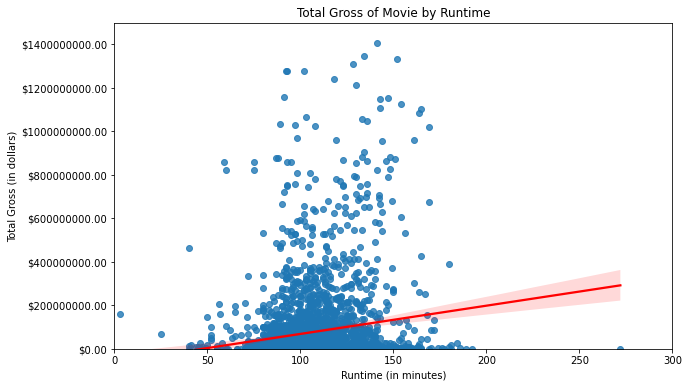

In [47]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(ax=ax, x='runtime_minutes', y='total_gross', data=movie_data, line_kws={'color': 'red'})
ax.set_xlabel('Runtime (in minutes)')
ax.set_ylabel('Total Gross (in dollars)')
ax.set_title('Total Gross of Movie by Runtime')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set(xlim=(0,300))
ax.set(ylim=(0,1500000000))

plt.show()

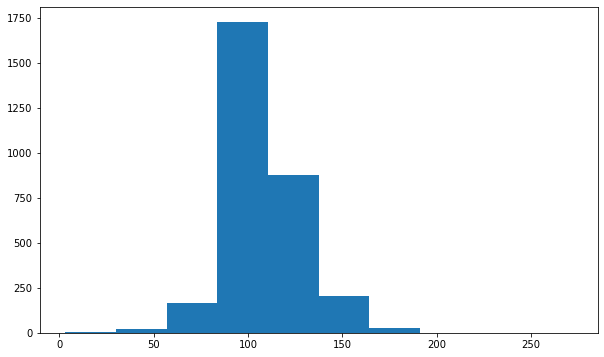

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(movie_data['runtime_minutes'])
plt.show()

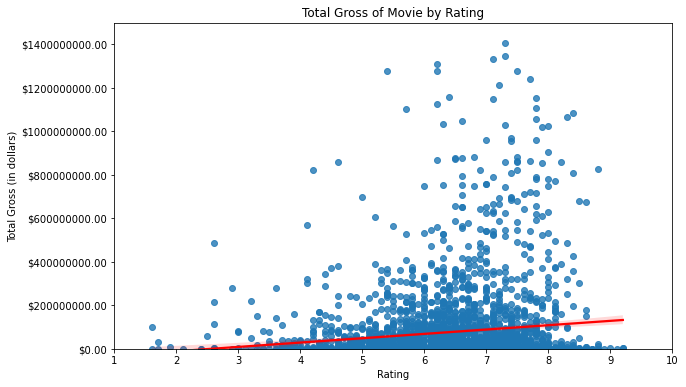

In [49]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(ax=ax, 
            x='average_rating', 
            y='total_gross', 
            data=movie_data, 
            line_kws={'color': 'red'})
ax.set_xlabel('Rating')
ax.set_ylabel('Total Gross (in dollars)')
ax.set_title('Total Gross of Movie by Rating')
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1500000000))

plt.show()